In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
import os
from astropy.table import Table

In [2]:
from read_sfh import get_scales
small_file_fname = "/Users/aphearin/Dropbox/UniverseMachine/data/histories/small_sfh_catalog_1.002310.txt"
scale_factor_array = get_scales(small_file_fname)
redshift_array = (1./scale_factor_array) - 1
cosmic_age_array = np.load(os.path.join(os.path.dirname(small_file_fname), 'prelim_sfh_reduction', 'times.npy'))

In [3]:
from collate_full_catalog import collate_catalog
z_string = 'z0'


history_colnames = ('halo_id', 'halo_upid', 'halo_mpeak', 'stellar_mass', 'sfr', 'sfr_mp', 'sm_mp')
halocat_propnames = ('halo_id', 'first_acc_scale', 'mpeak_scale', 'acc_rate_1tdyn')

cat = collate_catalog(z_string, history_colnames=history_colnames, 
                      halocat_propnames=halocat_propnames, verbose=True)

... Assembling history data
... Assembling halo catalog data
... Cross-matching on halo_id

Number of objects in history catalog = 701037
Number of objects in halo catalog = 12085858
Number of matching objects = 646460
Fraction of objects appearing in both catalogs = 0.922
Minimum logM* = 9.00


In [4]:
first_acc_index = np.interp(cat['first_acc_scale'], scale_factor_array, np.arange(len(scale_factor_array)))
cat['first_acc_index'] = np.round(first_acc_index).astype(int)

In [5]:
from pre_infall_average import pre_infall_average

In [6]:
satmask = cat['halo_upid'] != -1
sats = cat[satmask]
cenmask = (cat['halo_upid'] == -1) & (cat['first_acc_index'] >= 177)
cens = cat[cenmask]

In [19]:
# Mpeak-based mask
# logmpeak_low, logmpeak_high = 11.5, 11.75
# mask_sats = (sats['halo_mpeak'] > 10**logmpeak_low) & (sats['halo_mpeak'] < 10**logmpeak_high)
# mask_cens = (cens['halo_mpeak'] > 10**logmpeak_low) & (cens['halo_mpeak'] < 10**logmpeak_high)

# Stellar mass-based mask
logsm_low, logsm_high = 10.0, 10.1
mask_sats = (sats['stellar_mass'] > 10**logsm_low) & (sats['stellar_mass'] < 10**logsm_high)
mask_cens = (cens['stellar_mass'] > 10**logsm_low) & (cens['stellar_mass'] < 10**logsm_high)

In [20]:
avg_smh_sats = pre_infall_average(sats[mask_sats]['sm_mp'], sats[mask_sats]['first_acc_index'])
avg_smh_cens = np.mean(cens[mask_cens]['sm_mp'], axis=0)

In [21]:
avg_sfr_mp_sats = pre_infall_average(sats[mask_sats]['sfr_mp'], sats[mask_sats]['first_acc_index'])
avg_sfr_mp_sats_no_exclusion = np.mean(sats[mask_sats]['sfr_mp'], axis=0)
avg_sfr_mp_cens = np.mean(cens[mask_cens]['sfr_mp'], axis=0)

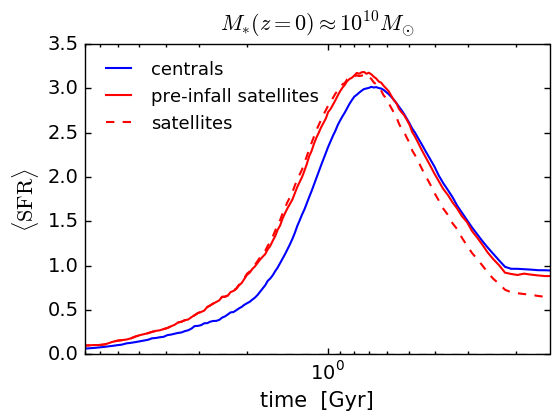

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

xlabel = ax.set_xlabel('time  [Gyr]', fontsize=15)
ylabel = ax.set_ylabel(r'$\langle{\rm SFR}\rangle$', fontsize=16)
title = ax.set_title(r'$M_{\ast}(z=0) \approx 10^{10}M_{\odot}$', fontsize=16, y=1.02) # y param fixes an overhanging title

last_idx = -1
ax.plot(redshift_array[:last_idx], avg_sfr_mp_cens[:last_idx], 
         color='blue', label='centrals', linewidth=1.5)
ax.plot(redshift_array[:last_idx], avg_sfr_mp_sats[:last_idx], 
         color='red', label='pre-infall satellites', linewidth=1.5)
ax.plot(redshift_array[:last_idx], avg_sfr_mp_sats_no_exclusion[:last_idx], 
         '--', color='red', label='satellites', linewidth=1.5)

ax.plot(np.logspace(-2, 2, 100), np.zeros(100), '--', color='gray')
plt.xlim(xmin=8, xmax=0.15)
plt.xscale('log')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.tick_params(axis='x', length=4, width=1, which='major')
ax.tick_params(axis='x', length=2, width=1, which='minor')
ax.tick_params(axis='y', length=4, width=1, which='major')
ax.tick_params(axis='y', length=2, width=1, which='minor')

plt.legend(frameon=False, loc='upper left', fontsize=13)

# fig.savefig('FIGS/pre_infall_evolution_cens_vs_sats.pdf',
#             bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')

array([ 0.00099187,  0.00010972,  0.00057029, ...,  0.00091241,
        0.00072591,  0.00082844])